In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import os
import mne
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import tensorflow
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.layers import Dense, Activation, Conv1D, MaxPooling1D, GlobalAveragePooling1D, Flatten, Dropout, BatchNormalization, Input,UpSampling1D
from tensorflow.keras.layers import concatenate, Lambda, Conv2D, MaxPooling2D, GlobalAveragePooling2D,LSTM
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping

c:\Users\ryoii\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\ryoii\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
# set directory
parent_dir = os.path.dirname(os.getcwd())

fo = os.path.join(parent_dir, 'data', 'Envisioned_Speech_Recognition', 'Char')
os.chdir(parent_dir)
print("Updated Working Directory:", os.getcwd())

Updated Working Directory: c:\Users\ryoii\Desktop\EEG2IMAGE


In [3]:
from __00_load_edf import load_alphabet
from __01_transform_data import process_band, transform_eeg_data, MA_X, MA_X2, butterworth_highpass_filter, notch_filter, zscore_standardize, dwt_reconstruct, minmax_scale, apply_ica_eeg
from __02_model import train, visualize, train_multibranch, evaluate, train_LateFusion, train_Attention_LateFusion
from __03_utils import plot_eeg, plot_eeg_1280

In [5]:
X, Y, channels = load_alphabet(fo)
print(f'shape of X : {X.shape}')
print(f'shape of Y : {Y.shape}')
print(channels)

Extracting EDF parameters from c:\Users\ryoii\Desktop\EEG2IMAGE\data\Envisioned_Speech_Recognition\Char\aashay_A.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Relevant Channels: ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
Extracting EDF parameters from c:\Users\ryoii\Desktop\EEG2IMAGE\data\Envisioned_Speech_Recognition\Char\aashay_C.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from c:\Users\ryoii\Desktop\EEG2IMAGE\data\Envisioned_Speech_Recognition\Char\aashay_F.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from c:\Users\ryoii\Desktop\EEG2IMAGE\data\Envisioned_Speech_Recognition\Char\aashay_H.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from c:\Users\ryoii\Desktop\EEG2IMAGE\data\Envisioned_

In [5]:
# #  Moving Average filter
# selected_channels = [4,9]
# dataset_type = 'alphabet_MA2'
# channels  = 'two_channel'
# X_new, Y_new = transform_eeg_data(X, Y, selected_channels, npt=34)
# print(X_new.shape)
# plot_eeg(X_new)

# X_filtered = MA_X2(X_new, axis=1, M=3)
# plot_eeg(X_filtered)


# model = train(X_filtered, Y_new, selected_channels, dataset_type=dataset_type, epochs=500, channels=channels)
# visualize(model, X_filtered, Y_new, selected_channels, dataset_type=dataset_type)

In [6]:
# #  Butterworth filter
# selected_channels = [4,9]
# dataset_type = 'alphabet_BW'
# channels  = 'two_channel'
# X_new, Y_new = transform_eeg_data(X, Y, selected_channels)
# print(X_new.shape)
# plot_eeg(X_new)
# X_filtered = butterworth_highpass_filter(X_new, cutoff=15, fs=128, order=2, axis=1)
# print(X_filtered.shape)
# plot_eeg(X_filtered)

# model = train(X_filtered, Y_new, selected_channels, dataset_type=dataset_type, epochs=500, channels=channels)
# visualize(model, X_filtered, Y_new, selected_channels, dataset_type=dataset_type)

In [7]:
# #  notch filter
# selected_channels = [4,9]
# dataset_type = 'alphabet_N'
# channels  = 'two_channel'
# X_new, Y_new = transform_eeg_data(X, Y, selected_channels)
# print(X_new.shape)
# plot_eeg(X_new)
# X_filtered = notch_filter(X_new, freq=60.0, fs=128, Q=30.0, axis=1)
# print(X_filtered.shape)
# plot_eeg(X_filtered)

# model = train(X_filtered, Y_new, selected_channels, dataset_type=dataset_type, epochs=500, channels=channels)
# visualize(model, X_filtered, Y_new, selected_channels, dataset_type=dataset_type)

In [8]:
# #  Z-score standardization
# selected_channels = [4,9]
# dataset_type = 'alphabet_Z'
# channels  = 'two_channel'
# X_new, Y_new = transform_eeg_data(X, Y, selected_channels)
# print(X_new.shape)
# plot_eeg(X_new)
# X_standardized = zscore_standardize(X_new, axis=1)
# plot_eeg(X_standardized)

# model = train(X_standardized, Y_new, selected_channels, dataset_type=dataset_type, epochs=500, channels=channels)
# visualize(model, X_standardized, Y_new, selected_channels, dataset_type=dataset_type)

In [9]:
# #  daubechies dwt
# selected_channels = [4,9]
# dataset_type = 'alphabet_DWT'
# channels  = 'two_channel'
# X_new, Y_new = transform_eeg_data(X, Y, selected_channels)
# print(X_new.shape)
# plot_eeg(X_new)
# X_reconstructed = dwt_reconstruct(X_new, threshold=0.01)
# plot_eeg(X_reconstructed)

# model = train(X_reconstructed, Y_new, selected_channels, dataset_type=dataset_type, epochs=500, channels=channels)
# visualize(model, X_reconstructed, Y_new, selected_channels, dataset_type=dataset_type)

In [10]:
# #  Min-max scaling
# selected_channels = [4,9]
# dataset_type = 'alphabet_mm'
# channels  = 'two_channel'
# X_new, Y_new = transform_eeg_data(X, Y, selected_channels)
# print(X_new.shape)
# plot_eeg(X_new)
# X_standardized = minmax_scale(X_new, axis=1)
# plot_eeg(X_standardized)

# model = train(X_standardized, Y_new, selected_channels, dataset_type=dataset_type, epochs=500, channels=channels)
# visualize(model, X_standardized, Y_new, selected_channels, dataset_type=dataset_type)

In [11]:
# #  ICA extraction
# selected_channels = [4,9]
# dataset_type = 'alphabet_ICA'
# channels  = 'two_channel'
# X_ICA = apply_ica_eeg(X)
# X_new, Y_new = transform_eeg_data(X_ICA, Y, selected_channels)
# plot_eeg(X_new)
# model = train(X_new, Y_new, selected_channels, dataset_type=dataset_type, epochs=500, channels=channels)
# visualize(model, X_new, Y_new, selected_channels, dataset_type=dataset_type)

In [7]:
THETA = (4, 7)
ALPHA = (7, 15)
BETA = (15, 31)
GAMMA = (31, None)
BETAGAMMA = (15, None)


In [8]:
# Gamma
selected_channels = [4,9]
dataset_type = 'alphabet'
channels  = 'two_channel'
X_new, Y_new = process_band(X, Y, l_freq=GAMMA[0], h_freq=GAMMA[1])

model = train(X_new, Y_new, selected_channels, dataset_type=dataset_type, epochs=50, type='GAMMA', channels=channels)
visualize(model, X_new, Y_new, selected_channels, dataset_type=dataset_type)

TypeError: train() got multiple values for argument 'dataset_type'

In [14]:
# # BETA
# selected_channels = [4,9]
# dataset_type = 'alphabet'
# channels  = 'two_channel'
# X_new, Y_new = process_band(X, Y, l_freq=BETA[0], h_freq=BETA[1])

# model = train(X_new, Y_new, selected_channels, dataset_type=dataset_type, epochs=50, type='BETA', channels=channels)
# visualize(model, X_new, Y_new, selected_channels, dataset_type=dataset_type)

In [15]:
# # Late Fusion
# selected_channels = [4,9]
# dataset_type = 'alphabet'
# channels  = 'two_channel'
# X_GAMMA, Y_FINAL = process_band(X, Y, l_freq=GAMMA[0], h_freq=GAMMA[1])
# X_BETA, Y_FINAL = process_band(X, Y, l_freq=BETA[0], h_freq=BETA[1])

# late_fusion_accuracy = train_LateFusion(
#     X_GAMMA, X_BETA, Y_FINAL, selected_channels=[4, 9], dataset_type='alphabet', num_classes=10, epochs=500, batch_size=128
# )


Epoch 1/500
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.1153 - loss: 2.5754
Epoch 1: val_loss improved from inf to 2.30905, saving model to model/two_channel/model_alphabet_GAMMA.keras
181/181 ━━━━━━━━━━━━━━━━━━━━ 17s 77ms/step - accuracy: 0.1153 - loss: 2.5744 - val_accuracy: 0.1028 - val_loss: 2.3091
Epoch 2/500
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.1601 - loss: 2.2275
Epoch 2: val_loss did not improve from 2.30905
181/181 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - accuracy: 0.1602 - loss: 2.2271 - val_accuracy: 0.0993 - val_loss: 2.4310
Epoch 3/500
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.2122 - loss: 2.0555
Epoch 3: val_loss did not improve from 2.30905
181/181 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 0.2123 - loss: 2.0551 - val_accuracy: 0.1064 - val_loss: 2.5194
Epoch 4/500
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.2499 - loss: 1.9338
Epoch 4: val_loss improved from 2.30905 to 2.26156, saving model to model/two_channel/mo

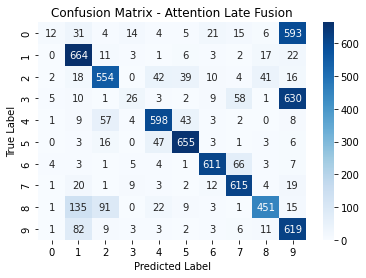

In [16]:
# Attention based Late Fusion
selected_channels = [4, 9]
dataset_type = 'alphabet'
X_GAMMA, Y_FINAL = process_band(X, Y, l_freq=GAMMA[0], h_freq=GAMMA[1])
X_BETA, Y_FINAL = process_band(X, Y, l_freq=BETA[0], h_freq=BETA[1])
attention_fusion_accuracy = train_Attention_LateFusion(
    X_GAMMA, X_BETA, Y_FINAL, selected_channels=[4, 9], dataset_type='alphabet', num_classes=10, epochs=500, batch_size=128
)


In [17]:
# # multi-branch
# selected_channels = [4,9]
# dataset_type = 'alphabet'
# channels  = 'two_channel'
# X_GAMMA, Y_GAMMA = process_band(X, Y, l_freq=GAMMA[0], h_freq=GAMMA[1])
# X_BETA, Y_BETA = process_band(X, Y, l_freq=BETA[0], h_freq=BETA[1])

# model = train_multibranch(X_BETA, X_GAMMA, Y_GAMMA, num_classes=10, epochs=500, batch_size=128, selected_channels=selected_channels)